In [ ]:
import numpy as nm
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from prophet import Prophet
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, r2_score
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings("ignore")

#### Implement a Time Series Forecasting model in Python, by using the FBProphet module. The forecasting model should be able to predict the Sunspots (see below) by using Facebook’s Prophet Time Series Forecasting model.Source: https://en.wikipedia.org/wiki/Sunspot
#### Daily data: http://www.sidc.be/silso/infosndtot


## DAILY TIMESERIES

In [ ]:
daily = pd.read_csv("SN_d_tot_V2.0.csv")

### Analyzing the Data

In [ ]:
daily.head()

1818;01;01;1818.001;  -1; -1.0;   0;1
0  1818;01;02;1818.004;  -1; -1.0;   0;1
1  1818;01;03;1818.007;  -1; -1.0;   0;1
2  1818;01;04;1818.010;  -1; -1.0;   0;1
3  1818;01;05;1818.012;  -1; -1.0;   0;1
4  1818;01;06;1818.015;  -1; -1.0;   0;1

In [ ]:
daily.shape

(74629, 1)

In [ ]:
daily.columns

Index(['1818;01;01;1818.001;  -1; -1.0;   0;1'], dtype='object')

In [ ]:
d = daily.copy()

In [ ]:
d.isnull().values.any()

False

In [ ]:
d = d["1818;01;01;1818.001;  -1; -1.0;   0;1"].str.split(";", expand = True)
d.head()

0   1   2         3     4      5     6  7
0  1818  01  02  1818.004    -1   -1.0     0  1
1  1818  01  03  1818.007    -1   -1.0     0  1
2  1818  01  04  1818.010    -1   -1.0     0  1
3  1818  01  05  1818.012    -1   -1.0     0  1
4  1818  01  06  1818.015    -1   -1.0     0  1

In [ ]:
d.shape

(74629, 8)

In [ ]:
d = d.rename(columns = {0: "year", 1: "month", 2: "day", 3: "date_in_fraction", 4: "sunspots",
                        5: "sunspots_std", 6: "observations", 7: "indicator"})

In [ ]:
new_row = pd.DataFrame({"year": "1818", "month": "01", "day": "01", "date_in_fraction": "1818.001", "sunspots": "-1",
                        "sunspots_std": "-1.0", "observations": "0", "indicator": "1"}, index = [0])

d = pd.concat([new_row, d]).reset_index(drop = True)

In [ ]:
d.head()

year month day date_in_fraction sunspots sunspots_std observations  \
0  1818    01  01         1818.001       -1         -1.0            0   
1  1818    01  02         1818.004       -1         -1.0            0   
2  1818    01  03         1818.007       -1         -1.0            0   
3  1818    01  04         1818.010       -1         -1.0            0   
4  1818    01  05         1818.012       -1         -1.0            0   

  indicator  
0         1  
1         1  
2         1  
3         1  
4         1

In [ ]:
d.columns

Index(['year', 'month', 'day', 'date_in_fraction', 'sunspots', 'sunspots_std',
       'observations', 'indicator'],
      dtype='object')

In [ ]:
d1 = d.copy()
d1.shape

(74630, 8)

In [ ]:
d1.isnull().values.any()

False

### Make code agnostic of the input, i.e., have your code determine the unit of the time series.

In [ ]:
from datetime import datetime

d1["date_int"] = d1["year"].astype(str) + d1["month"].astype(str).str.zfill(2) + d1["day"].astype(str).str.zfill(2)
d1["date"] = pd.to_datetime(d1["date_int"], format = "%Y%m%d")

In [ ]:
d1["year"] = d1["year"].astype("int")
d1["month"] = d1["month"].astype("int")
d1["day"] = d1["day"].astype("int")
d1["sunspots"] = d1["sunspots"].astype("int")
d1["observations"] = d1["observations"].astype("int")
d1["indicator"] = d1["indicator"].astype("int")
d1.dtypes

year                         int64
month                        int64
day                          int64
date_in_fraction            object
sunspots                     int64
sunspots_std                object
observations                 int64
indicator                    int64
date_int                    object
date                datetime64[ns]
dtype: object

In [ ]:
d1.tail()

year  month  day date_in_fraction  sunspots sunspots_std  observations  \
74625  2022      4   26         2022.316       132         21.8            43   
74626  2022      4   27         2022.319       132         14.8            43   
74627  2022      4   28         2022.322       135         15.5            42   
74628  2022      4   29         2022.325       107         21.4            39   
74629  2022      4   30         2022.327        51          8.3            35   

       indicator  date_int       date  
74625          0  20220426 2022-04-26  
74626          0  20220427 2022-04-27  
74627          0  20220428 2022-04-28  
74628          0  20220429 2022-04-29  
74629          0  20220430 2022-04-30

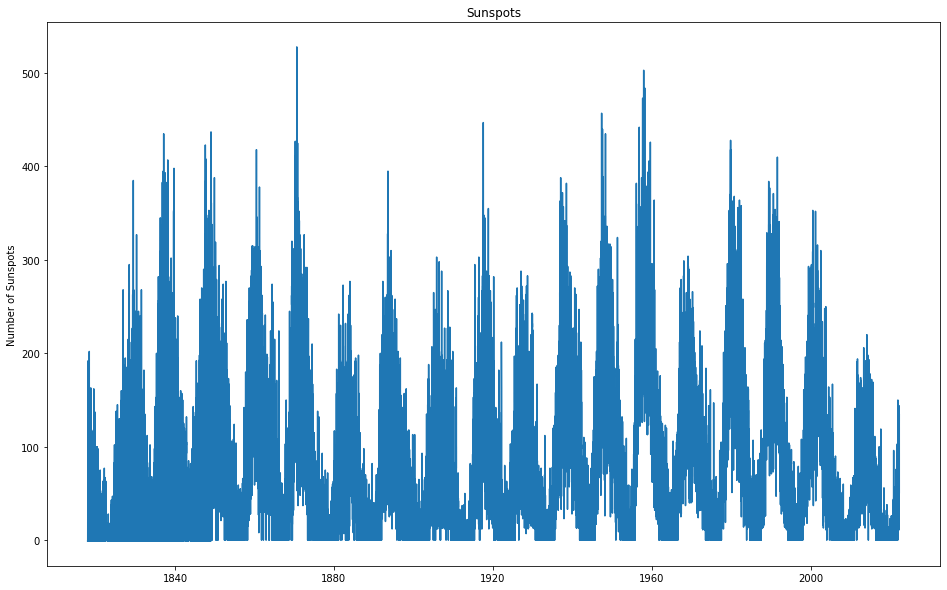

In [ ]:
plt.figure(figsize = (16, 10))
plt.plot(d1["date"], d1["sunspots"])
plt.title("Sunspots")
plt.ylabel("Number of Sunspots")
plt.show()

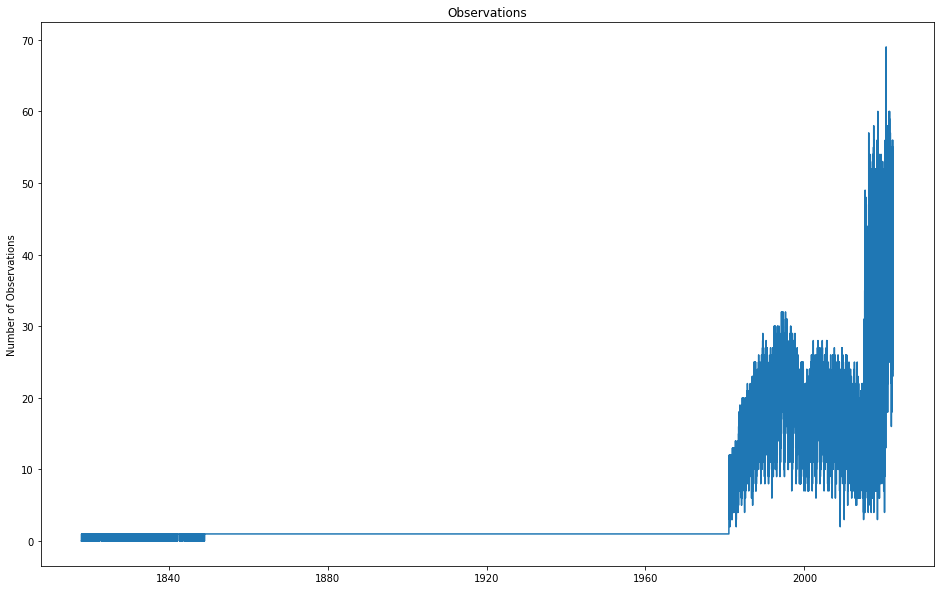

In [ ]:
plt.figure(figsize = (16, 10))
plt.plot(d1["date"], d1["observations"])
plt.title("Observations")
plt.ylabel("Number of Observations")
plt.show()

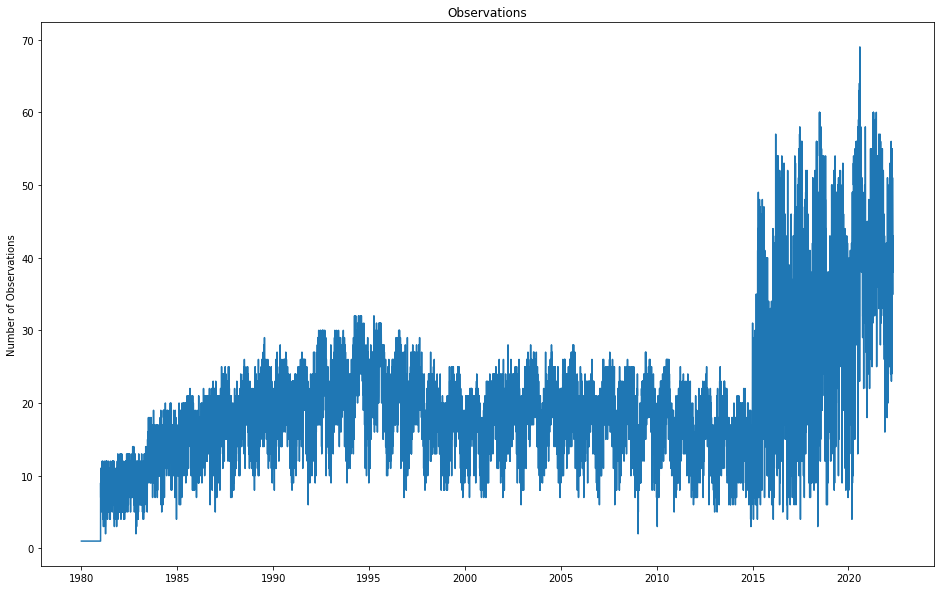

In [ ]:
d1_zoomed_in = d1.loc[d1["year"].between(1980, 2022)]

plt.figure(figsize = (16, 10))
plt.plot(d1_zoomed_in["date"], d1_zoomed_in["observations"])
plt.title("Observations")
plt.ylabel("Number of Observations")
plt.show()

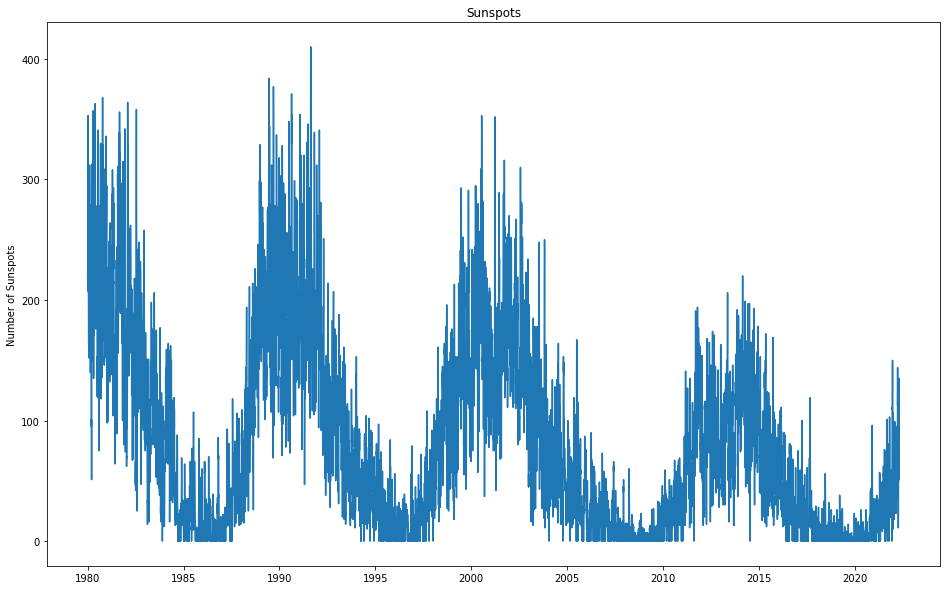

In [ ]:
d1_zoomed_in = d1.loc[d1["year"].between(1980, 2022)]

plt.figure(figsize = (16, 10))
plt.plot(d1_zoomed_in["date"], d1_zoomed_in["sunspots"])
plt.title("Sunspots")
plt.ylabel("Number of Sunspots")
plt.show()

### Training the model and predicting Sunspots values from the last date of the dataset into X units of time into the future.

Should the unit of time be day, predict the number of sunspots for 100/200/365 days into the future.

Tuning the FBProphet model on the following parameters:

a) Forecasting growth: Plausible values = logistic; linear; flat https://facebook.github.io/prophet/docs/saturating_forecasts.html


b) Seasonality: Add manual seasonality by using the add_seasonality method. Test it with various values for ‘period’ and ‘fourier_order’. https://facebook.github.io/prophet/docs/seasonality,_holiday_effects,_and_regressors.html


c) Trend Changepoints: Tune the ‘n_changepoints’ and ‘changepoit_prior_scale’ arguments/parameters https://facebook.github.io/prophet/docs/trend_changepoints.html

In [ ]:
df = d1[["date", "sunspots"]]
df.tail()

date  sunspots
74625 2022-04-26       132
74626 2022-04-27       132
74627 2022-04-28       135
74628 2022-04-29       107
74629 2022-04-30        51

In [ ]:
col_dict = {"date": "ds", \
            "sunspots": "y"}

df.columns = [col_dict.get(x, x) for x in df.columns]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74630 entries, 0 to 74629
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      74630 non-null  datetime64[ns]
 1   y       74630 non-null  int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 1.1 MB


In [ ]:
df = df.assign(y = (df["y"]))

In [ ]:
df.head()

ds  y
0 1818-01-01 -1
1 1818-01-02 -1
2 1818-01-03 -1
3 1818-01-04 -1
4 1818-01-05 -1

#### Seasonality

In [ ]:
model = Prophet(daily_seasonality = True)

In [ ]:
model.fit(df)

In [ ]:
s100_future = model.make_future_dataframe(periods = 100)
s100_future.tail()

ds
74725 2022-08-04
74726 2022-08-05
74727 2022-08-06
74728 2022-08-07
74729 2022-08-08

In [ ]:
s100_prediction = model.predict(s100_future)
s100_prediction

ds      trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0     1818-01-01   1.022606  -89.226319   93.577768     1.022606     1.022606   
1     1818-01-02   1.032919  -86.430381   90.089156     1.032919     1.032919   
2     1818-01-03   1.043231  -83.788172   98.613811     1.043231     1.043231   
3     1818-01-04   1.053543  -85.937611   87.746961     1.053543     1.053543   
4     1818-01-05   1.063855  -89.429024   96.871711     1.063855     1.063855   
...          ...        ...         ...         ...          ...          ...   
74725 2022-08-04  16.508952  -63.228129  116.142109    16.508952    16.508952   
74726 2022-08-05  16.501680  -62.973986  108.344369    16.501680    16.501680   
74727 2022-08-06  16.494409  -64.345752  120.329168    16.494409    16.494409   
74728 2022-08-07  16.487137  -64.085829  117.426044    16.487137    16.487137   
74729 2022-08-08  16.479865  -65.036228  111.043363    16.479865    16.479865   

       additive_terms  additive_terms_lower  additive_terms_upper     daily  \
0            2.759517              2.759517              2.759517  8.127137   
1            2.109245              2.109245              2.109245  8.127137   
2            2.457934              2.457934              2.457934  8.127137   
3            2.080848              2.080848              2.080848  8.127137   
4            2.174420              2.174420              2.174420  8.127137   
...               ...                   ...                   ...       ...   
74725        9.133745              9.133745              9.133745  8.127137   
74726        8.942150              8.942150              8.942150  8.127137   
74727        9.749479              9.749479              9.749479  8.127137   
74728        9.824455              9.824455              9.824455  8.127137   
74729       10.357062             10.357062             10.357062  8.127137   

       ...    weekly  weekly_lower  weekly_upper    yearly  yearly_lower  \
0      ...  0.097949      0.097949      0.097949 -5.465569     -5.465569   
1      ... -0.376563     -0.376563     -0.376563 -5.641329     -5.641329   
2      ...  0.125729      0.125729      0.125729 -5.794932     -5.794932   
3      ... -0.121422     -0.121422     -0.121422 -5.924867     -5.924867   
4      ...  0.077318      0.077318      0.077318 -6.030035     -6.030035   
...    ...       ...           ...           ...       ...           ...   
74725  ...  0.097949      0.097949      0.097949  0.908660      0.908660   
74726  ... -0.376563     -0.376563     -0.376563  1.191577      1.191577   
74727  ...  0.125729      0.125729      0.125729  1.496613      1.496613   
74728  ... -0.121422     -0.121422     -0.121422  1.818740      1.818740   
74729  ...  0.077318      0.077318      0.077318  2.152607      2.152607   

       yearly_upper  multiplicative_terms  multiplicative_terms_lower  \
0         -5.465569                   0.0                         0.0   
1         -5.641329                   0.0                         0.0   
2         -5.794932                   0.0                         0.0   
3         -5.924867                   0.0                         0.0   
4         -6.030035                   0.0                         0.0   
...             ...                   ...                         ...   
74725      0.908660                   0.0                         0.0   
74726      1.191577                   0.0                         0.0   
74727      1.496613                   0.0                         0.0   
74728      1.818740                   0.0                         0.0   
74729      2.152607                   0.0                         0.0   

       multiplicative_terms_upper       yhat  
0                             0.0   3.782123  
1                             0.0   3.142164  
2                             0.0   3.501165  
3                             0.0   3.134391  
4                             0.0   3.238275  
...                 

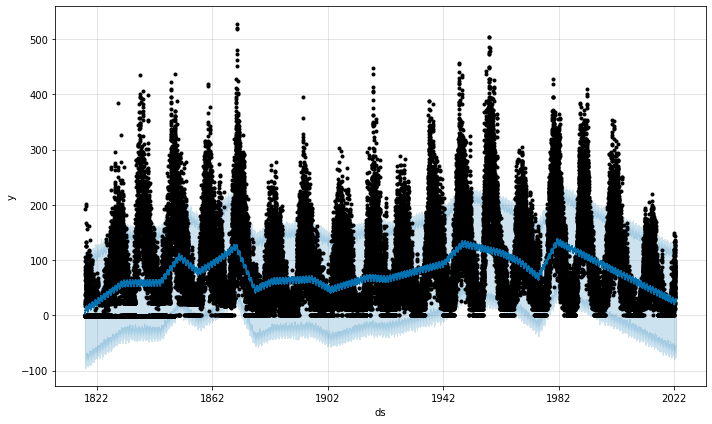

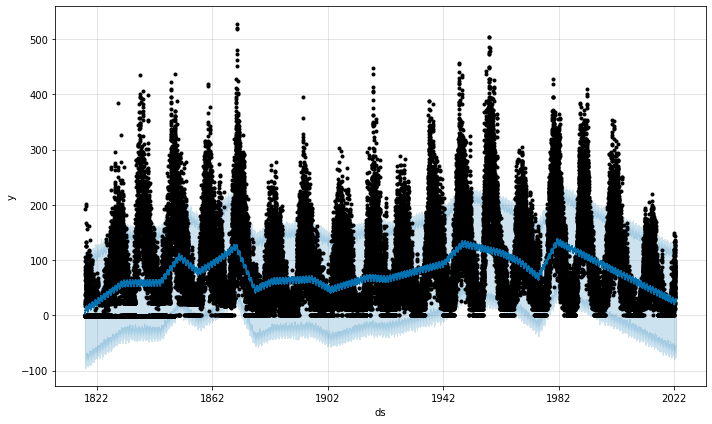

In [ ]:
model.plot(s100_prediction)

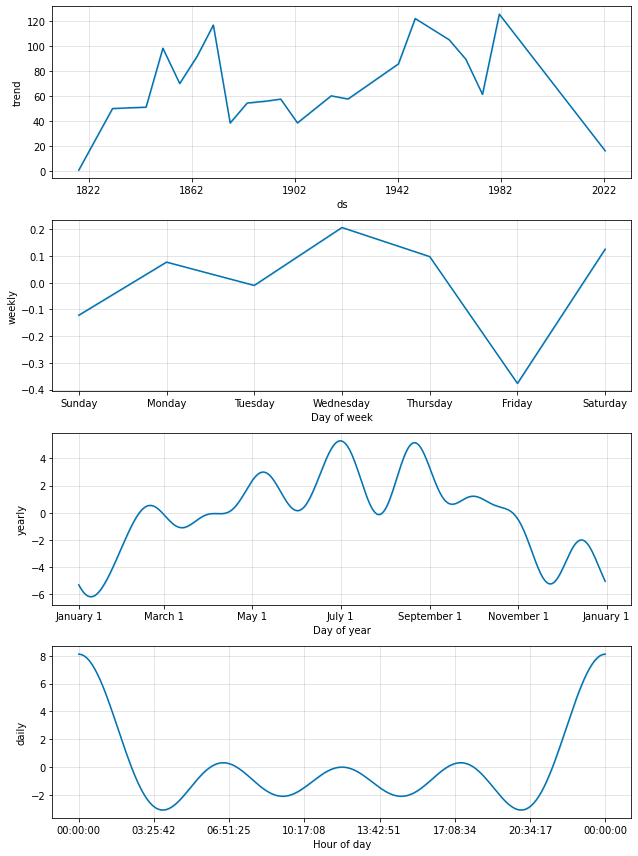

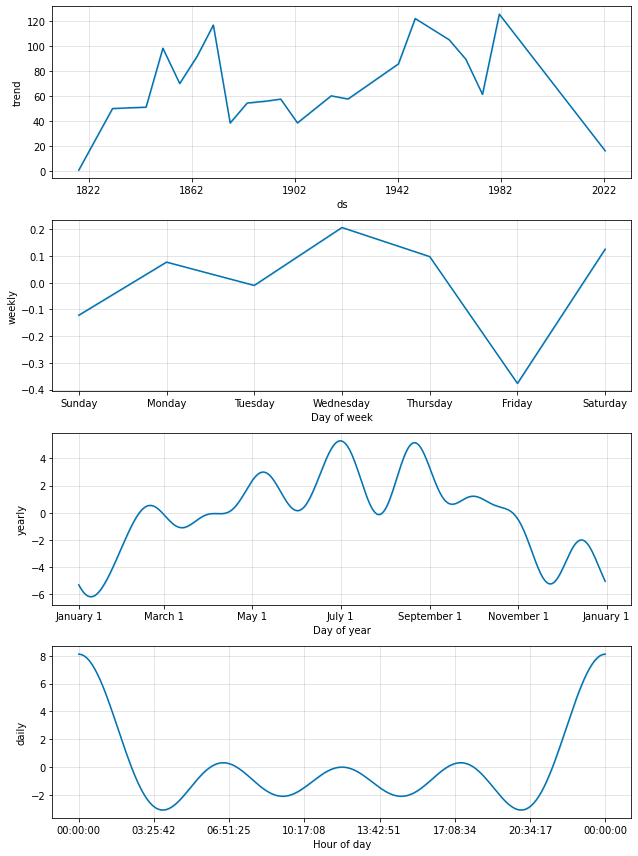

In [ ]:
model.plot_components(s100_prediction)

In [ ]:
s200_future = model.make_future_dataframe(periods = 200)
s200_future.tail()

ds
74825 2022-11-12
74826 2022-11-13
74827 2022-11-14
74828 2022-11-15
74829 2022-11-16

In [ ]:
s200_prediction = model.predict(s200_future)
s200_prediction

ds      trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0     1818-01-01   1.022606  -86.820072   94.452517     1.022606     1.022606   
1     1818-01-02   1.032919  -90.961676   93.322430     1.032919     1.032919   
2     1818-01-03   1.043231  -88.497429   98.566038     1.043231     1.043231   
3     1818-01-04   1.053543  -86.263692   97.010605     1.053543     1.053543   
4     1818-01-05   1.063855  -84.142656   93.839272     1.063855     1.063855   
...          ...        ...         ...         ...          ...          ...   
74825 2022-11-12  15.781792  -64.608382  112.242556    15.781792    15.781792   
74826 2022-11-13  15.774520  -70.580176  111.376101    15.774520    15.774520   
74827 2022-11-14  15.767249  -72.238112  119.893629    15.767249    15.767249   
74828 2022-11-15  15.759977  -71.185491  113.124693    15.759977    15.759977   
74829 2022-11-16  15.752706  -73.534129  109.723406    15.752706    15.752706   

       additive_terms  additive_terms_lower  additive_terms_upper     daily  \
0            2.759517              2.759517              2.759517  8.127137   
1            2.109245              2.109245              2.109245  8.127137   
2            2.457934              2.457934              2.457934  8.127137   
3            2.080848              2.080848              2.080848  8.127137   
4            2.174420              2.174420              2.174420  8.127137   
...               ...                   ...                   ...       ...   
74825        4.972128              4.972128              4.972128  8.127137   
74826        4.438796              4.438796              4.438796  8.127137   
74827        4.361885              4.361885              4.361885  8.127137   
74828        4.013751              4.013751              4.013751  8.127137   
74829        3.988234              3.988234              3.988234  8.127137   

       ...    weekly  weekly_lower  weekly_upper    yearly  yearly_lower  \
0      ...  0.097949      0.097949      0.097949 -5.465569     -5.465569   
1      ... -0.376563     -0.376563     -0.376563 -5.641329     -5.641329   
2      ...  0.125729      0.125729      0.125729 -5.794932     -5.794932   
3      ... -0.121422     -0.121422     -0.121422 -5.924867     -5.924867   
4      ...  0.077318      0.077318      0.077318 -6.030035     -6.030035   
...    ...       ...           ...           ...       ...           ...   
74825  ...  0.125729      0.125729      0.125729 -3.280738     -3.280738   
74826  ... -0.121422     -0.121422     -0.121422 -3.566920     -3.566920   
74827  ...  0.077318      0.077318      0.077318 -3.842570     -3.842570   
74828  ... -0.009861     -0.009861     -0.009861 -4.103525     -4.103525   
74829  ...  0.206851      0.206851      0.206851 -4.345753     -4.345753   

       yearly_upper  multiplicative_terms  multiplicative_terms_lower  \
0         -5.465569                   0.0                         0.0   
1         -5.641329                   0.0                         0.0   
2         -5.794932                   0.0                         0.0   
3         -5.924867                   0.0                         0.0   
4         -6.030035                   0.0                         0.0   
...             ...                   ...                         ...   
74825     -3.280738                   0.0                         0.0   
74826     -3.566920                   0.0                         0.0   
74827     -3.842570                   0.0                         0.0   
74828     -4.103525                   0.0                         0.0   
74829     -4.345753                   0.0                         0.0   

       multiplicative_terms_upper       yhat  
0                             0.0   3.782123  
1                             0.0   3.142164  
2                             0.0   3.501165  
3                             0.0   3.134391  
4                             0.0   3.238275  
...                 

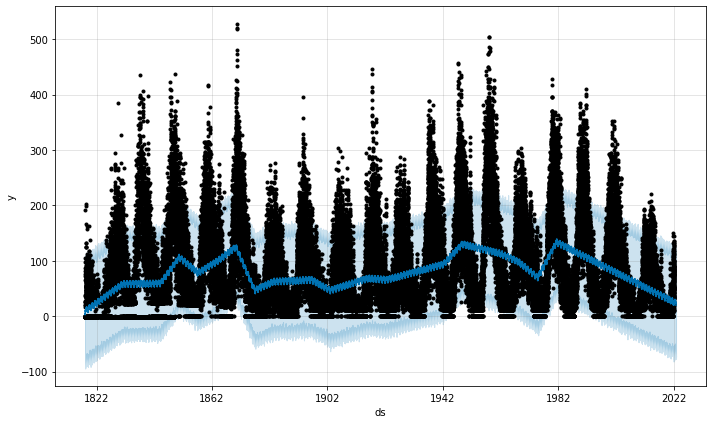

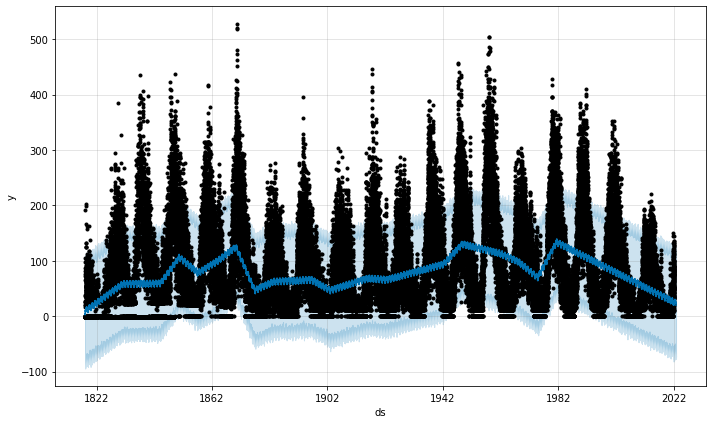

In [ ]:
model.plot(s200_prediction)

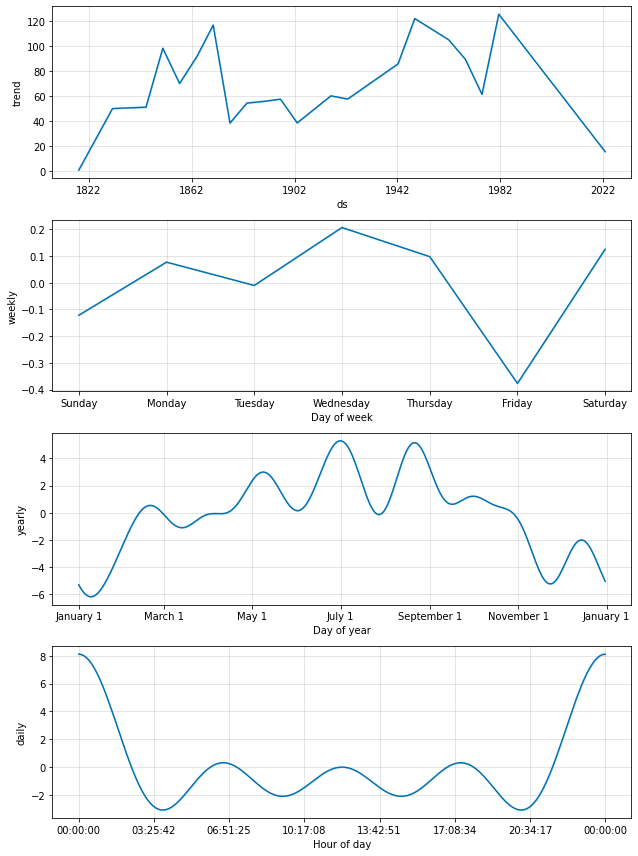

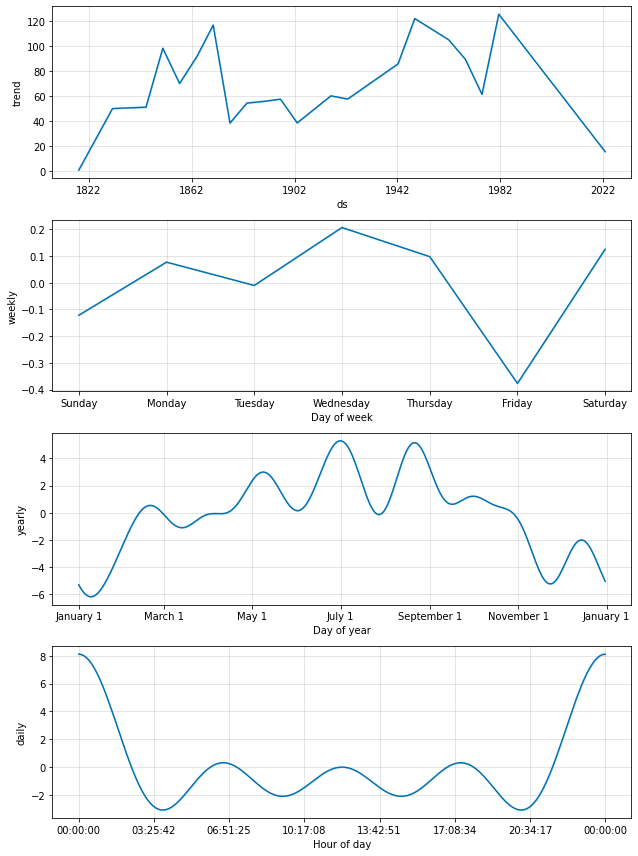

In [ ]:
model.plot_components(s200_prediction)

In [ ]:
s365_future = model.make_future_dataframe(periods = 365)
s365_future.tail()

ds
74990 2023-04-26
74991 2023-04-27
74992 2023-04-28
74993 2023-04-29
74994 2023-04-30

In [ ]:
s365_prediction = model.predict(s365_future)
s365_prediction

ds      trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0     1818-01-01   1.022606  -84.521644   92.734610     1.022606     1.022606   
1     1818-01-02   1.032919  -84.506688   96.848905     1.032919     1.032919   
2     1818-01-03   1.043231  -86.003733   99.689252     1.043231     1.043231   
3     1818-01-04   1.053543  -81.066947   97.659052     1.053543     1.053543   
4     1818-01-05   1.063855  -87.385184   93.135258     1.063855     1.063855   
...          ...        ...         ...         ...          ...          ...   
74990 2023-04-26  14.581978  -67.702329  120.516667    14.581978    14.581978   
74991 2023-04-27  14.574707  -65.969770  114.453936    14.574707    14.574707   
74992 2023-04-28  14.567435  -76.029570  112.204227    14.567435    14.567435   
74993 2023-04-29  14.560164  -68.212991  111.864035    14.560164    14.560164   
74994 2023-04-30  14.552892  -76.165798  113.786711    14.552892    14.552892   

       additive_terms  additive_terms_lower  additive_terms_upper     daily  \
0            2.759517              2.759517              2.759517  8.127137   
1            2.109245              2.109245              2.109245  8.127137   
2            2.457934              2.457934              2.457934  8.127137   
3            2.080848              2.080848              2.080848  8.127137   
4            2.174420              2.174420              2.174420  8.127137   
...               ...                   ...                   ...       ...   
74990        9.764225              9.764225              9.764225  8.127137   
74991        9.835150              9.835150              9.835150  8.127137   
74992        9.540422              9.540422              9.540422  8.127137   
74993       10.219625             10.219625             10.219625  8.127137   
74994       10.143635             10.143635             10.143635  8.127137   

       ...    weekly  weekly_lower  weekly_upper    yearly  yearly_lower  \
0      ...  0.097949      0.097949      0.097949 -5.465569     -5.465569   
1      ... -0.376563     -0.376563     -0.376563 -5.641329     -5.641329   
2      ...  0.125729      0.125729      0.125729 -5.794932     -5.794932   
3      ... -0.121422     -0.121422     -0.121422 -5.924867     -5.924867   
4      ...  0.077318      0.077318      0.077318 -6.030035     -6.030035   
...    ...       ...           ...           ...       ...           ...   
74990  ...  0.206851      0.206851      0.206851  1.430237      1.430237   
74991  ...  0.097949      0.097949      0.097949  1.610064      1.610064   
74992  ... -0.376563     -0.376563     -0.376563  1.789848      1.789848   
74993  ...  0.125729      0.125729      0.125729  1.966759      1.966759   
74994  ... -0.121422     -0.121422     -0.121422  2.137920      2.137920   

       yearly_upper  multiplicative_terms  multiplicative_terms_lower  \
0         -5.465569                   0.0                         0.0   
1         -5.641329                   0.0                         0.0   
2         -5.794932                   0.0                         0.0   
3         -5.924867                   0.0                         0.0   
4         -6.030035                   0.0                         0.0   
...             ...                   ...                         ...   
74990      1.430237                   0.0                         0.0   
74991      1.610064                   0.0                         0.0   
74992      1.789848                   0.0                         0.0   
74993      1.966759                   0.0                         0.0   
74994      2.137920                   0.0                         0.0   

       multiplicative_terms_upper       yhat  
0                             0.0   3.782123  
1                             0.0   3.142164  
2                             0.0   3.501165  
3                             0.0   3.134391  
4                             0.0   3.238275  
...                 

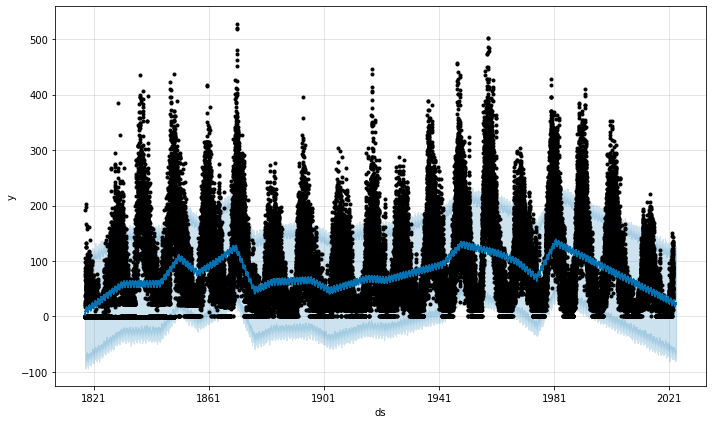

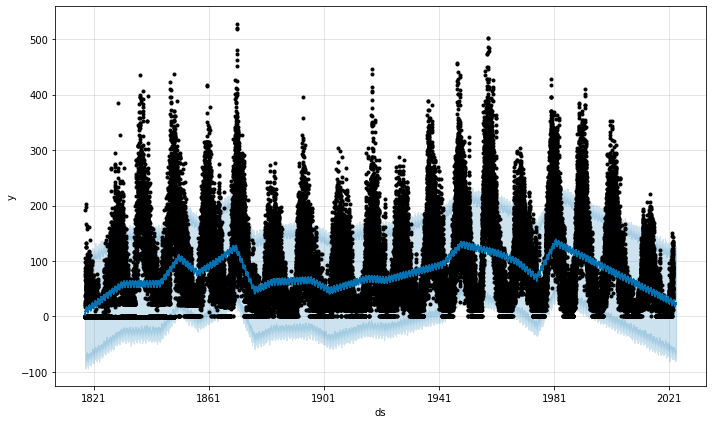

In [ ]:
model.plot(s365_prediction)

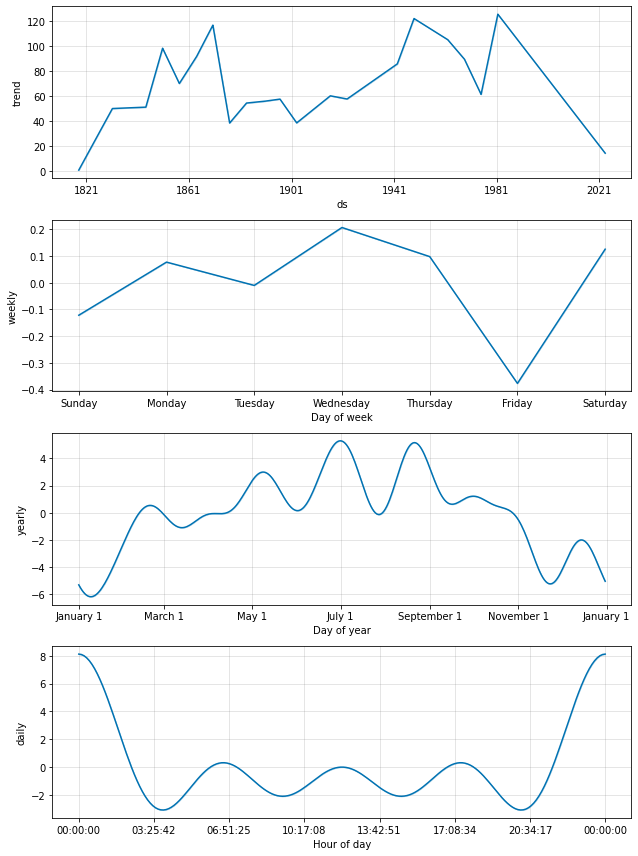

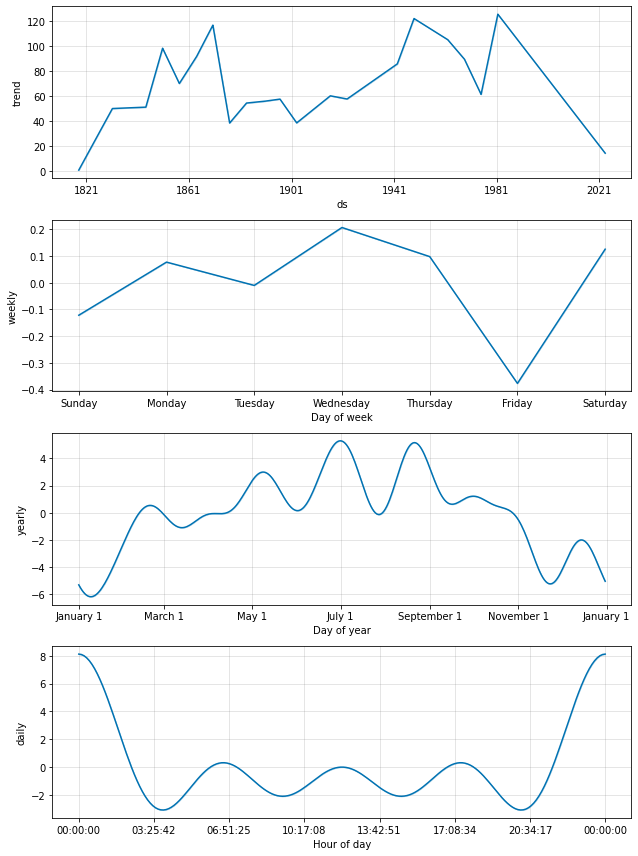

In [ ]:
model.plot_components(s365_prediction)

#### Forecasting Growth

In [ ]:
model = Prophet(growth = "linear")
model.fit(df)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
future100 = model.make_future_dataframe(periods = 100)
linear100_prediction = model.predict(future100)

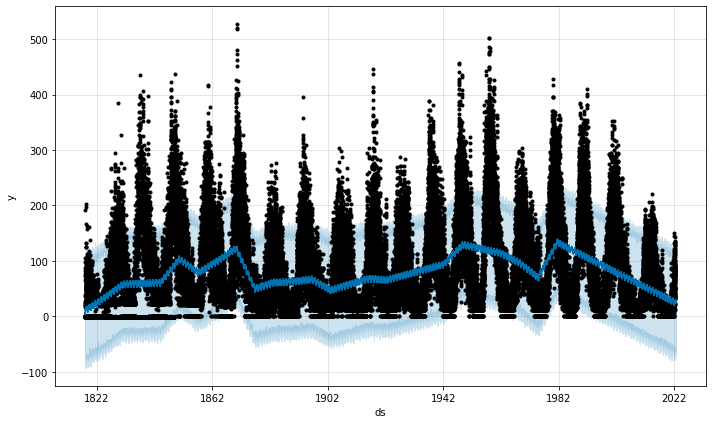

In [ ]:
fig = model.plot(linear100_prediction)

In [ ]:
future200 = model.make_future_dataframe(periods = 200)
linear200_prediction = model.predict(future200)

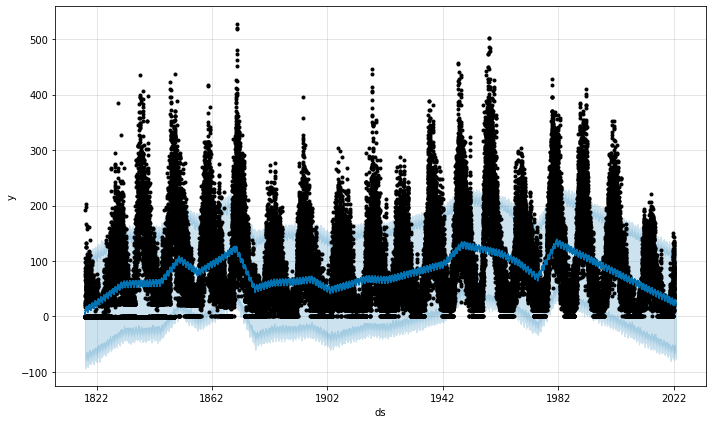

In [ ]:
fig = model.plot(linear200_prediction)

In [ ]:
future365 = model.make_future_dataframe(periods = 365)
linear365_prediction = model.predict(future365)

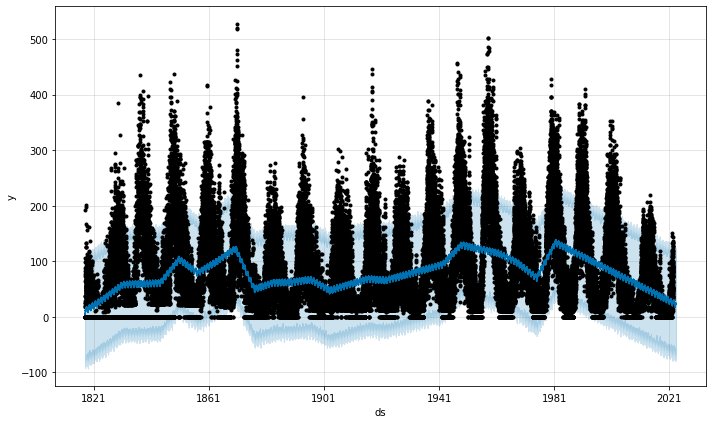

In [ ]:
fig = model.plot(linear365_prediction)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


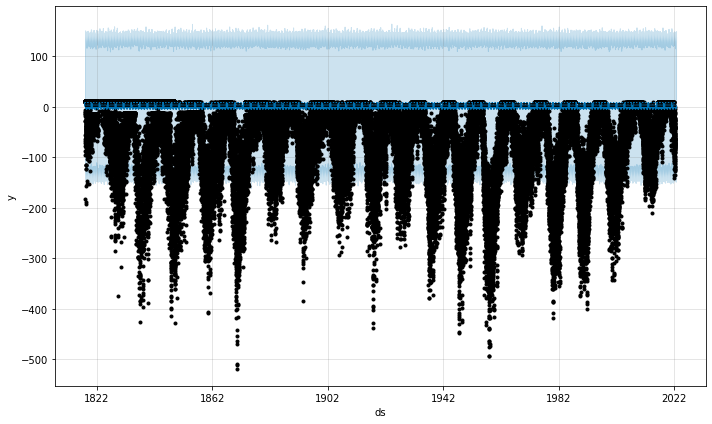

In [ ]:
df["y"] = 10 - df["y"]
df["cap"] = 6
df["floor"] = 1.5
future100["cap"] = 6
future100["floor"] = 1.5
model = Prophet(growth = "logistic")
model.fit(df)
logistic100_prediction = model.predict(future100)
fig = model.plot(logistic100_prediction)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


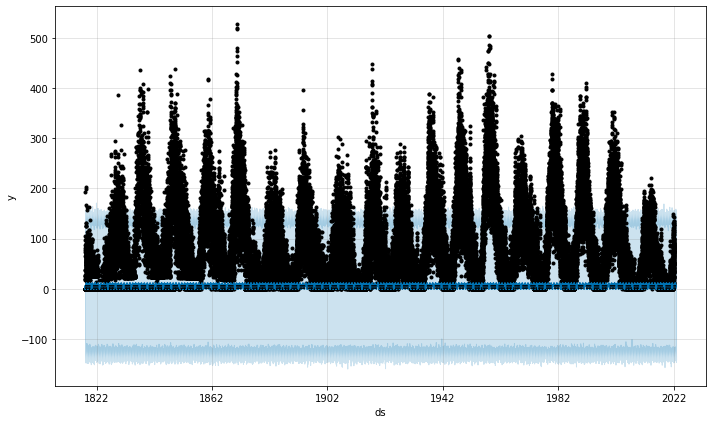

In [ ]:
df["y"] = 10 - df["y"]
df["cap"] = 6
df["floor"] = 1.5
future200["cap"] = 6
future200["floor"] = 1.5
model = Prophet(growth = "logistic")
model.fit(df)
logistic200_prediction = model.predict(future200)
fig = model.plot(logistic200_prediction)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


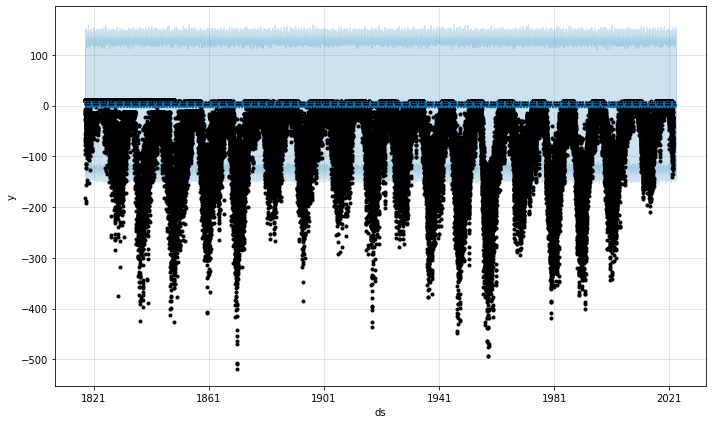

In [ ]:
df["y"] = 10 - df["y"]
df["cap"] = 6
df["floor"] = 1.5
future365["cap"] = 6
future365["floor"] = 1.5
model = Prophet(growth = "logistic")
model.fit(df)
logistic365_prediction = model.predict(future365)
fig = model.plot(logistic365_prediction)

In [ ]:
model = Prophet(growth = "flat")
model.fit(df)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


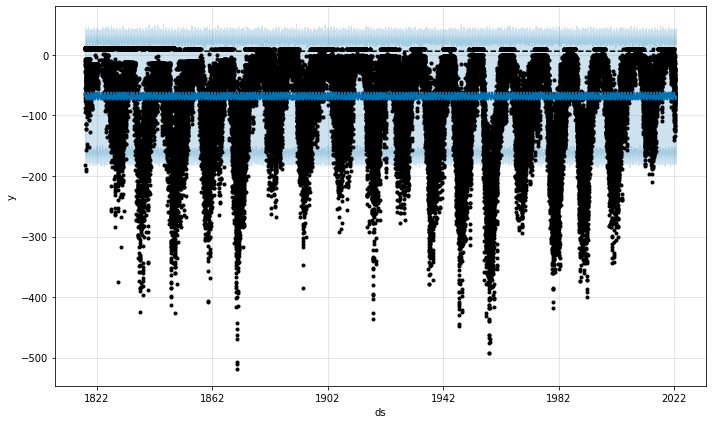

In [ ]:
flat100_prediction = model.predict(future100)
fig = model.plot(flat100_prediction)

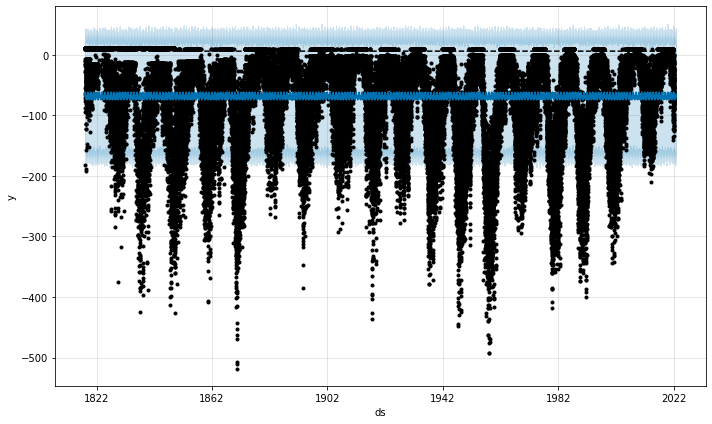

In [ ]:
flat200_prediction = model.predict(future200)
fig = model.plot(flat200_prediction)

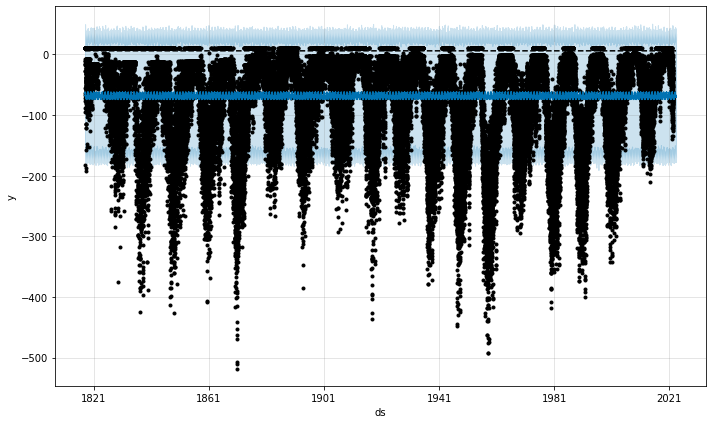

In [ ]:
flat365_prediction = model.predict(future365)
fig = model.plot(flat365_prediction)

#### Trend Changepoints

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


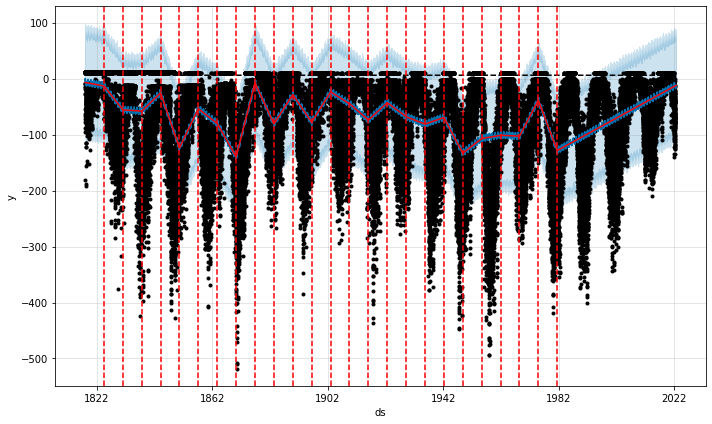

In [ ]:
from prophet.plot import add_changepoints_to_plot
model = Prophet(changepoint_prior_scale = 0.5)
prediction = model.fit(df)
trend100_prediction = prediction.predict(future100)
fig = model.plot(trend100_prediction)
a1 = add_changepoints_to_plot(fig.gca(), model, trend100_prediction)

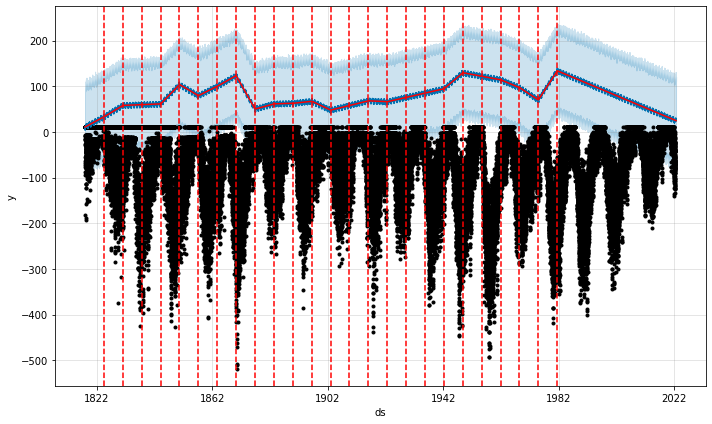

In [ ]:
fig = model.plot(linear100_prediction)
a1 = add_changepoints_to_plot(fig.gca(), model, linear100_prediction)

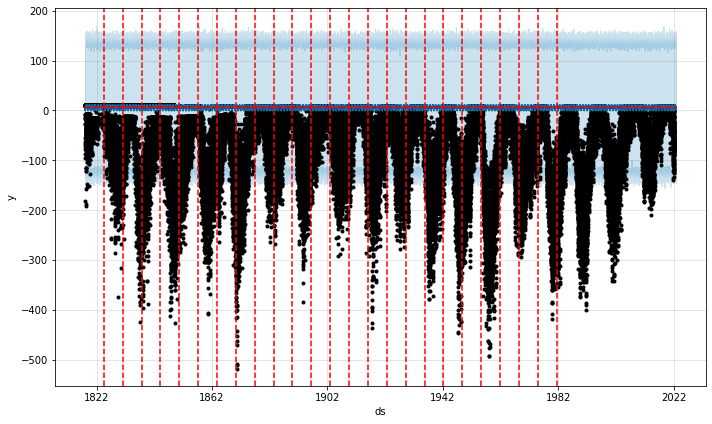

In [ ]:
fig = model.plot(logistic200_prediction)
a2 = add_changepoints_to_plot(fig.gca(), model, logistic200_prediction)

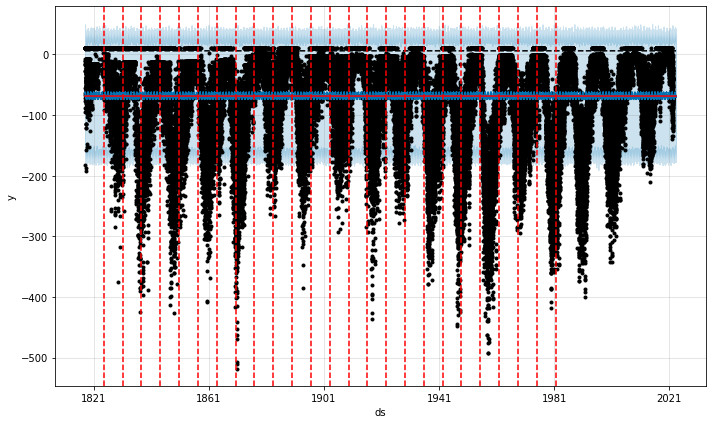

In [ ]:
fig = model.plot(flat365_prediction)
a3 = add_changepoints_to_plot(fig.gca(), model, flat365_prediction)

### Evaluate models by providing respective MAE (Mean Absolute Error), MAPE (Mean Absolute Percentage Error), and R^2(use sklearn’s respective metrics).

logistic 10
logistic 20
logistic 30
linear 10
linear 20
linear 30
flat 10
flat 20
flat 30


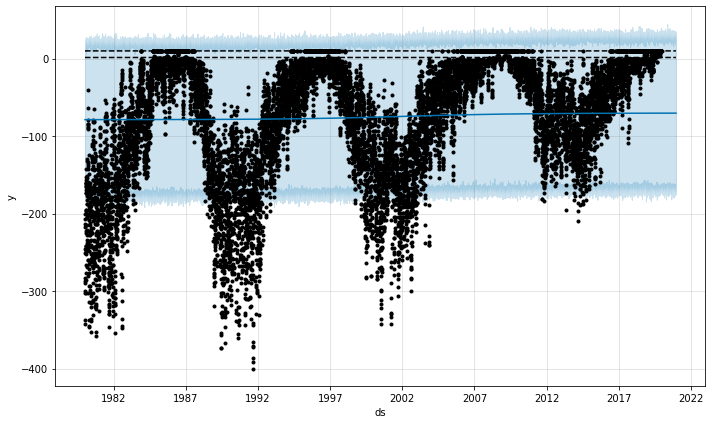

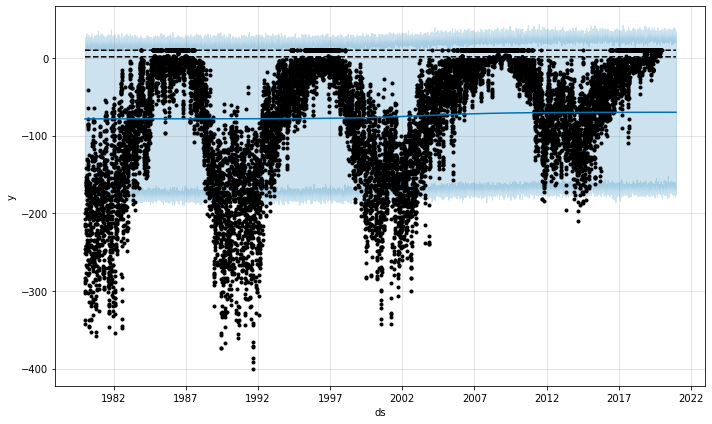

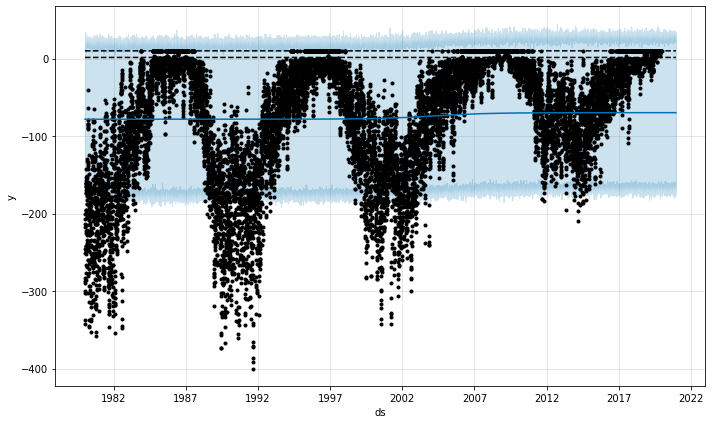

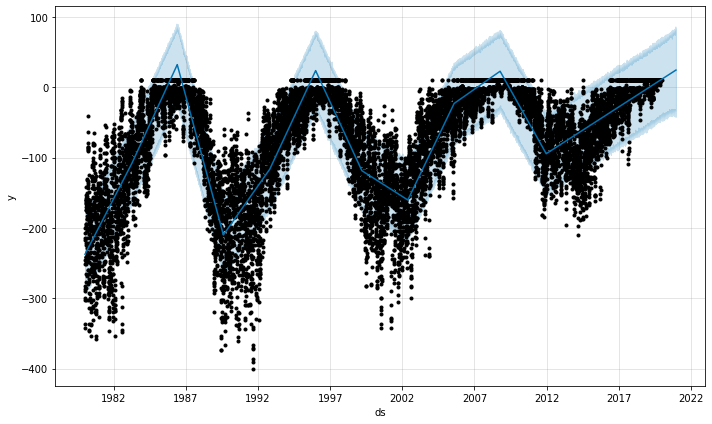

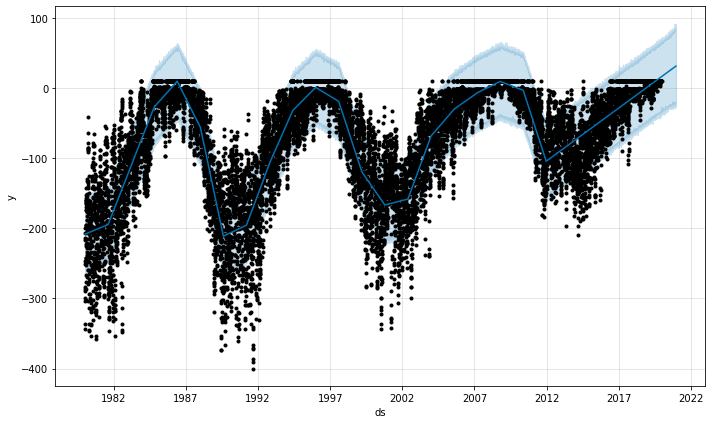

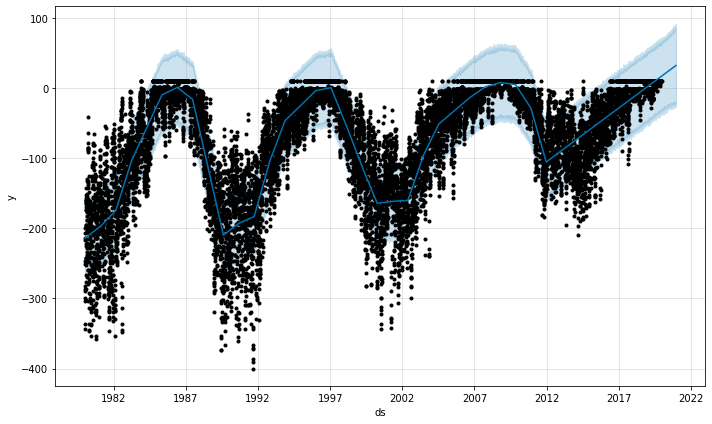

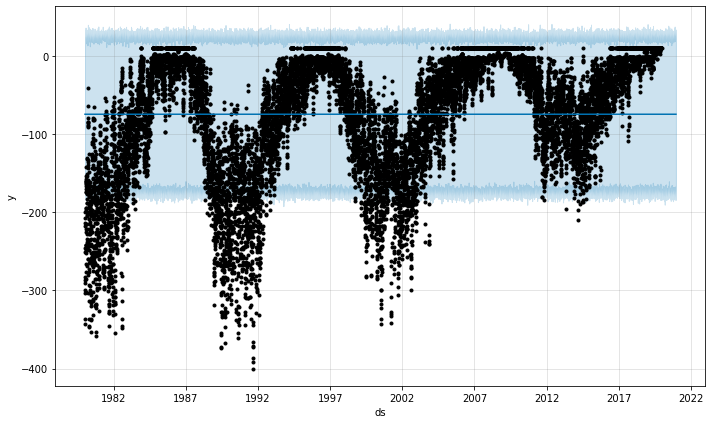

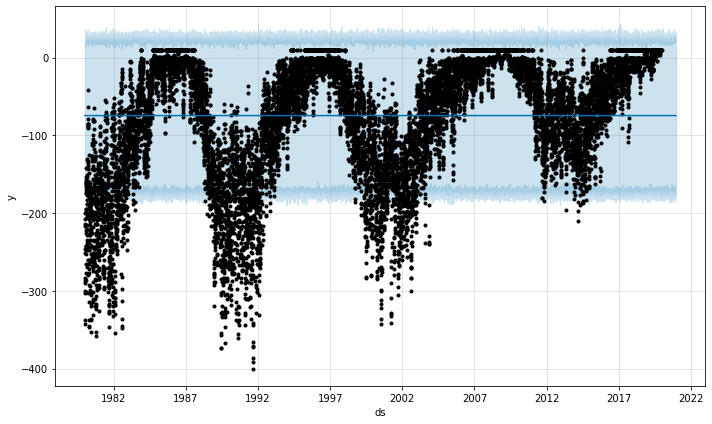

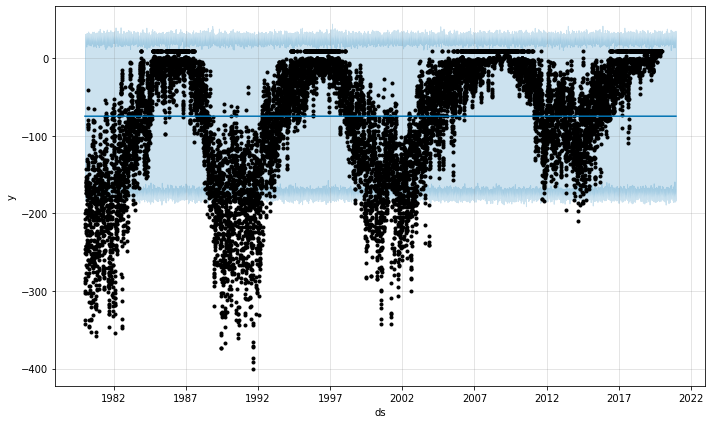

In [ ]:
results = pd.DataFrame(columns = ["MAE", "MAPE", "R2", "Growth", "Value"])
df1 = df.copy()
df1 = df1.loc[d1["year"].between(1980, 2022)]
df1["cap"] = int(max(df.iloc[:365*40, 1]))
df1["floor"] = 1.5

for growth in ["logistic", "linear", "flat"]:
  for value in [10, 20, 30]:
    model = Prophet(daily_seasonality = False,
                    weekly_seasonality = False,
                    yearly_seasonality = False,
                    growth = growth,
                    changepoint_prior_scale = value/100,
                    n_changepoints=value).add_seasonality(name = "daily",
                                                          period = 1,
                                                          fourier_order = value)
    if growth == "logistic":
      model.fit(df1.iloc[:365*40,:])
    else:
      model.fit(df1.iloc[:365*40,:])

    future = model.make_future_dataframe(periods = 365, freq = "D")

    if growth == "logistic":
      future["cap"] = int(max(df1.iloc[:365*40, 1]))
      future["floor"] = 1.5

    prediction = model.predict(future)
    print(growth + " " + str(value))
    model.plot(prediction, uncertainty = True)
    results = results.append({"MAE": mean_absolute_error(df.iloc[(365*40): (365*41), 1], prediction["yhat"][-365:]),
                              "MAPE":mean_absolute_percentage_error(df.iloc[(365*40): (365*41), 1], prediction["yhat"][-365:]),
                              "R2": r2_score(df.iloc[(365*40): (365*41), 1], prediction["yhat"][-365:]),
                              "Growth": growth,
                              "Value": value}, ignore_index=True)

In [ ]:
results

MAE      MAPE        R2    Growth Value
0   44.199737  0.950896 -0.181332  logistic    10
1   44.290643  0.946604 -0.188043  logistic    20
2   44.330733  0.945039 -0.190646  logistic    30
3  110.646315  1.333599 -4.469733    linear    10
4  116.637097  1.455207 -4.969749    linear    20
5  117.210642  1.466776 -5.019164    linear    30
6   43.369375  0.994603 -0.120293      flat    10
7   43.369447  0.994598 -0.120300      flat    20
8   43.369455  0.994597 -0.120301      flat    30